In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# Parte di Matteo per il setup

In [2]:
from functions import load_graph_1, load_graph_2 , top_N_filter

graph1 = load_graph_1()
graph2 = load_graph_2()


# Functionality and visualization 2

#### Brief introductoin to centrality - <a href="https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/" >Source</a>


The concept of _centrality_ in networks (thus in graphs) is crucial for analyzing the most relevant factors, revealing the parts of the network that need the most attention.

We have different types of centrality that represent a different characteristic of a node in a network:

1. **Degree centrality** assigns an importance score based simply on the number of links held by each node, i.e. how many direct connections each node has to other nodes in the network. In our case is very useful for finding very connected (popular) heroes. So this centrality is high for heroes with more collaborations or antagonists/rivals and that appear in many comics. Formal definition:
$$Degree\_ centrality(v) = \frac{degree(v)}{(n-1)}$$


2. **Betweenness centrality** measures the number of times a node lies on the shortest path between other nodes. This measure shows which nodes are ‘bridges’ between nodes in a network. It is useful for finding the individuals who influence the flow around a system but we have to pay attention: a high betweenness count could indicate someone holds authority over disparate clusters in a network, or just that they are on the periphery of both clusters. So we could find some hero that has an high centrality simply because makes an appearance in many comic books but it is not a properly a fundamental node. Formal definition:
$$Betweenness\_ centrality(v) = \sum_{u,v \in V} \frac{g_{v}(u,v)}{g(u,v)} \cdot \frac{(n-1)(n-2)}{2} \space, \space\space\space g_{v}(u,v)= shortest\_ path(u-v) \space that \space passes \space through \space v\space, \space\space\space g(u,v)= shortest\_ path( u-v ) $$


3. **Closeness centrality** scores each node based on their ‘closeness’ to all other nodes in the network. This measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths. It is useful for finding the individuals who are best placed to influence the entire network most quickly and can help find good ‘broadcasters’, but in a highly-connected network, you will often find all nodes have a similar score. Fortunately, in our case we have a sparse graph ( density << 0.5) so this metric is positively discriminating. Formal definition:
$$Closeness\_ centrality(v) = \frac{(n-1)}{\sum_{u \in V} distance(v, u)} \space, \space\space\space distance(v, u)=  number\space of\space edges\space between\space nodes\space v\space and\space u $$

4. **PageRank centrality** assigns nodes a score based on their connections, and their connections’ connections (simulating the citation system in academic papers). This measure uncovers nodes whose influence extends beyond their direct connections into the wider network. Because it takes into account direction and connection weight, PageRank can be helpful for understanding citations and authority, i.e. dead end pages (no links).

In [4]:
from functions import clean_comm

#### 'functionality_2' description

Input:

>- a graph
>- a node
>- One of the given metrics : Betweeness , PageRank, ClosenessCentrality , DegreeCentrality (a string)
>- an integer N: denoting the top N heroes that their data should be considered

Output:

>- The metric's value over the considered graph
>- The given node's value

In [5]:
def functionality_2(graph, node, metric, N=6439):

    graph = top_N_filter(graph, N)

    metric = clean_comm(metric)
    result = eval(f'nx.{metric}(graph)[node]')
    return (node, result)

Now we evaluate every type of centrality for the node correspondent to Spider Man

In [6]:
node = "SPIDER-MAN/PETER PAR"
centr_types = ["Degree", "Betweenness", "Closeness", "Pagerank"]
centr_measures = []
print(f'Centrality for the node {node}')

for centr in centr_types:
    measure = functionality_2(graph1, node, centr)[1]
    centr_measures.append(measure)
    print(f'{centr} centrality: {measure}')

Centrality for the node SPIDER-MAN/PETER PAR
Degree centrality: 0.2705607476635514
Betweenness centrality: 0.07358526356259767
Closeness centrality: 0.5741568906637035
Pagerank centrality: 0.004745481147019864


To give a further explanation about how centrality measures work in our particular network we do some consideration and then we observe some pratical example picking the centrality values for the "most popular" hero... Spider Man!

In our case we can consider the _graph1_ given in input to _functionality2_ as a proper **social network**. Thus, finding the heroes with some kind of high centrality, we are able to find individuals with a relative importance/influence over their context (the Marvel Universe).

We can draw the following conclusions looking at our example above:

>- The **degree centrality** gives a first raw definition of popularity based on the number of collaborations that a hero has. We can see that this is likely to turn out to be lower than other measures at the time when the hero makes an appearance in very few comic books or few other heroes appear in the comic books in which he is featured. Note that in this case no weight is given to the importance of individual hero collaboration.

>- In the case of **betweenness centrality** we can see a much lower value than the previous one. In fact, this one identifies the importance of an individual in terms of authority in multiple stories (comics) that cannot be attributed to the same cluster. Clearly Spider man does not turn out to be a good bridge between clusters of heroes.

>- **Closeness centrality**, on the other hand, is particularly high for heroes who have very high effective influence as they are able to reach other nodes with greater speed. In that case, such a measure not only reflects how many direct relationships Spider man has been able to build over time (as in the case of degree centrality) but also how much indirect knowledge with few degrees of separation he is able to boast. In the reduced graph, however, we have a certain degree of sparsity, and this centrality takes on distinct values at the various nodes.

>- Finally, the **pagerank centrality** derives in turn from the **Eigen centrality**, which takes the closeness centrality a step further by also taking into consideration the degree to which a node is connected, the number of links and so on across the network. In this case seems that Spider man is pretty popular but have not that much links with other "popular" heroes.

#### Visualization time

In [7]:
def centr_table(graph, metric, N):
    data = defaultdict(list)
    graph_tmp = top_N_filter(graph, N)
    for node in graph_tmp.nodes:
        data['node'].append(node)
        data['centrality'].append(functionality_2(graph, node, metric, N)[1])

    data['avg'] = sum(data['centrality'])/N

    return data

Visualizing our results in tabular form with threee columns:
>- node name;
>- centrality measure of that specific node;
>- average centrality over all the network's nodes.

In [8]:
centrality_tab = pd.DataFrame(centr_table(graph1, "degree", 100))
centrality_tab.head(10)

,node,centrality,avg
0,ANGEL/WARREN KENNETH,0.979798,0.814141
1,ANT-MAN/DR. HENRY J.,0.939394,0.814141
2,"BANNER, BETTY ROSS T",0.767677,0.814141
3,BEAST/HENRY &HANK& P,0.979798,0.814141
4,BLACK KNIGHT V/DANE,0.909091,0.814141
5,BLACK PANTHER/T'CHAL,0.888889,0.814141
6,BLACK WIDOW/NATASHA,0.969697,0.814141
7,"CAGE, LUKE/CARL LUCA",0.919192,0.814141
8,CAPTAIN AMERICA,1.000000,0.814141
9,CAPTAIN BRITAIN/BRIA,0.838384,0.814141


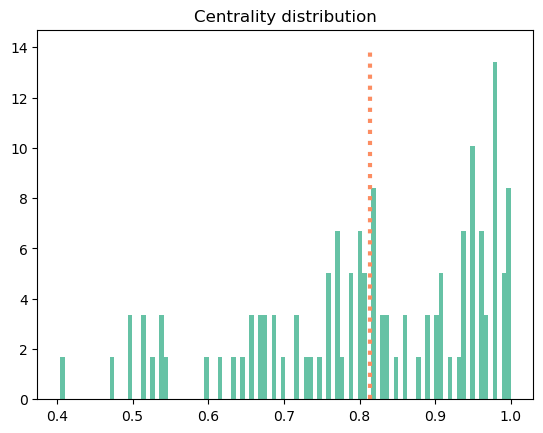

In [10]:
plt.hist(centrality_tab.centrality, density=True, bins = centrality_tab.shape[0], color=plt.cm.Set2(0))
plt.title("Centrality distribution")
plt.vlines( x = centrality_tab.avg[1], ymin=0, ymax=14,
           colors = plt.cm.Set2(1), ls=':', lw=3,
           label = 'vline_multiple - full height')
 
plt.show()

Let's proceed with a comparision about the different types of centrality for the top 10 heroes to confirm what we claimed before.

In [11]:
centrality_tab1 = pd.DataFrame(centr_table(graph1, "degree", 100))
centrality_tab2 = pd.DataFrame(centr_table(graph1, "betweenness", 100))
centrality_tab3 = pd.DataFrame(centr_table(graph1, "closeness", 100))
centrality_tab4 = pd.DataFrame(centr_table(graph1, "pagerank", 100))

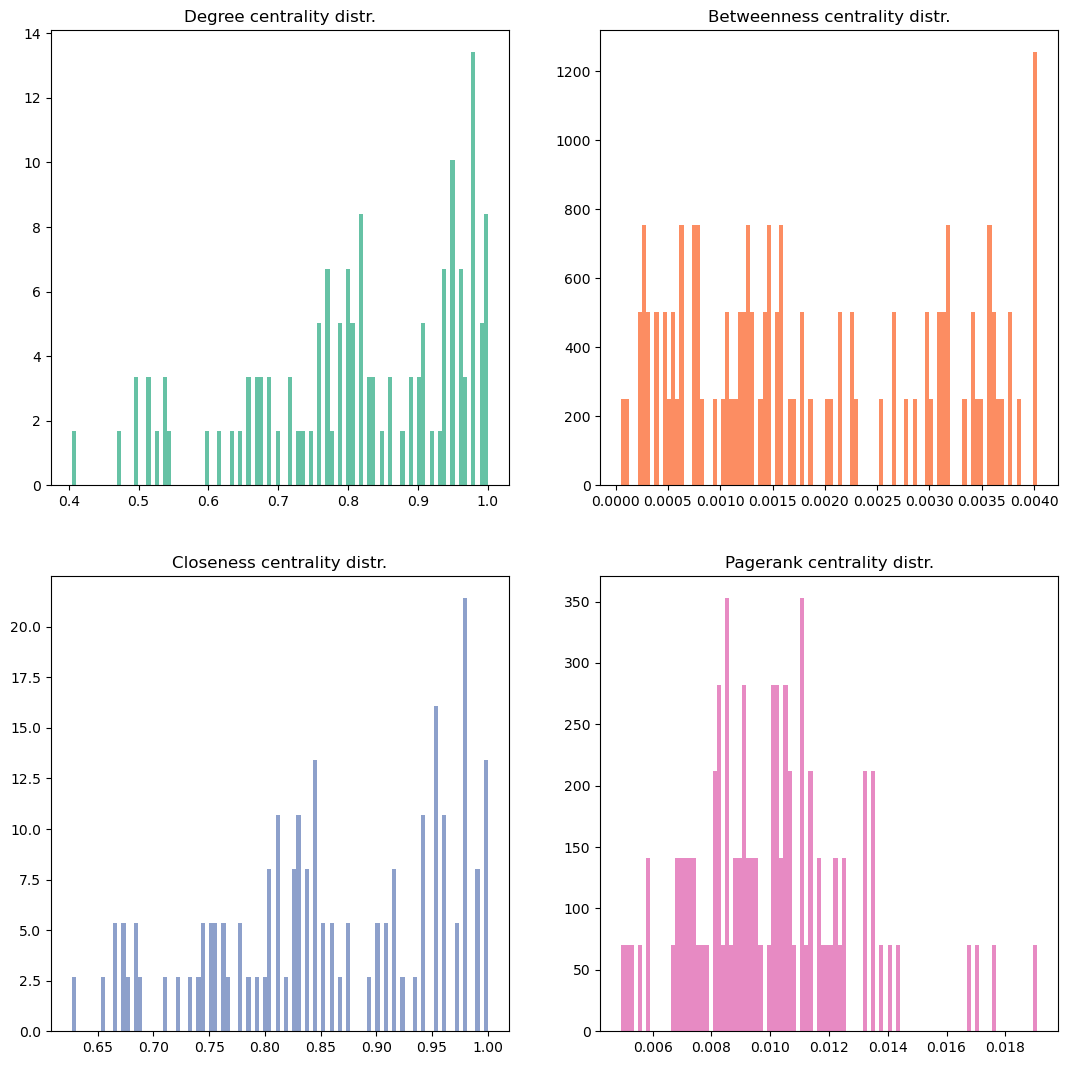

<Figure size 10000x800 with 0 Axes>

In [12]:
figure, axis = plt.subplots(2, 2, figsize=(13, 13))
plt.figure(figsize=(100, 8))
axis[0, 0].hist(centrality_tab1.centrality, density=True, bins = centrality_tab1.shape[0], color=plt.cm.Set2(0))
axis[0, 0].set_title("Degree centrality distr.")
  
axis[0, 1].hist(centrality_tab2.centrality, density=True, bins = centrality_tab2.shape[0], color=plt.cm.Set2(1))
axis[0, 1].set_title("Betweenness centrality distr.")
  
axis[1, 0].hist(centrality_tab3.centrality, density=True, bins = centrality_tab3.shape[0], color=plt.cm.Set2(2))
axis[1, 0].set_title("Closeness centrality distr.")
  
axis[1, 1].hist(centrality_tab4.centrality, density=True, bins = centrality_tab4.shape[0], color=plt.cm.Set2(3))
axis[1, 1].set_title("Pagerank centrality distr.")
  
plt.show()

In [97]:
print("Average centrality levels by type")
print(f'average degree centrality: {round(centrality_tab1.avg[1],2)}')
print(f'average betweenness centrality: {round(centrality_tab2.avg[1],2)}')
print(f'average closeness centrality: {round(centrality_tab3.avg[1],2)}')
print(f'average pagerank centrality: {round(centrality_tab4.avg[1],2)}')

Average centrality levels by type
average degree centrality: 0.81
average betweenness centrality: 0.0
average closeness centrality: 0.86
average pagerank centrality: 0.01


Note copme in the reduced graph case this is particularly dense and the remaining heroes exhibit high closeness and degree centrality. Pagerank and betweenness, on the other hand, lose significance the moment the graph loses many nodes and "clusters" of heroes.

# Functionality and visualization 4

#### 'functionality_4' description

Input:

>- The graph data
>- heroA: a superhero to which will relate sub-graph G_a
>- heroB: a superhero to which will relate sub-graph G_b
>- N: denoting the top N heroes that their data should be considered

Output:
>- The minimum number of links (by considering their weights) required to disconnect the original graph in two disconnected subgraphs: G_a and G_b;
>- the two connected components that derive from the original graph.

In [13]:
def functionality_4(graph, heroA, heroB, N=6439):

    # reducing the dimension of the original graph
    graph = top_N_filter(graph, N)

    # removing the min cut (max flow) between the two nodes
    min_cut = list(nx.minimum_edge_cut(graph, s=heroA, t=heroB, flow_func=None))
    graph.remove_edges_from(min_cut)

    # create two copies of the disconnected graph
    graphA = graph.copy()
    graphB = graph.copy()

    # evaluate the diwsconnected components (nodes)
    nodesA = nx.node_connected_component(graph, heroA)
    nodesB = nx.node_connected_component(graph, heroB)

    # remove nodes not owned by the connected component and create two separate graphs
    graphA.remove_nodes_from(nodesB)                                                                                                                                                    
    graphB.remove_nodes_from(nodesA)  
    
    return (min_cut, graphA, graphB)

In [14]:
# Function for mapping colors when plotting the networks

def fit_colors(graph, hero1, hero2=None):

    node_map = []
    for n in graph.nodes:
        if n == hero1: 
            node_map.append(plt.cm.Set2(0))
        elif n== hero2:
            node_map.append(plt.cm.Set2(2))
        else: 
            node_map.append(plt.cm.Set2(3))

    edge_map = []
    if hero2 != None:

        min_cut = list(nx.minimum_edge_cut(graph, s=hero1, t=hero2, flow_func=None))

        for e in graph.edges:
            if (e in min_cut) or (e[::-1] in min_cut):
                edge_map.append(plt.cm.Set2(1))
            else:
                edge_map.append(plt.cm.Set2(7))

    return (node_map, edge_map)

To disconnect the graph we have to remove 9 links


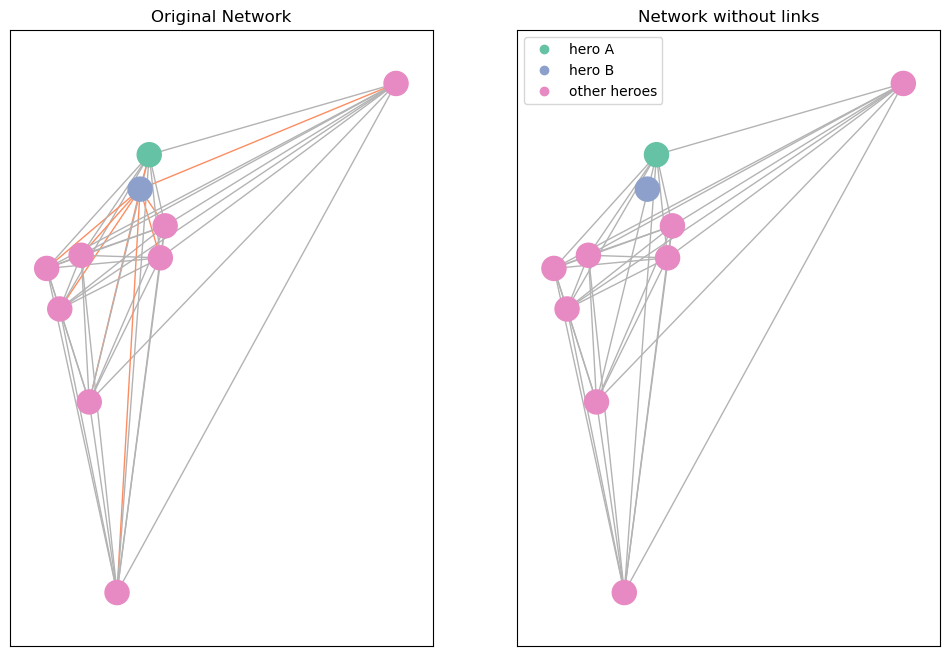

In [22]:
def vis_4(graph, heroA, heroB, N):

    # evaluate the min number of links to disconnect the graph
    min_cut, g1, g2 = functionality_4(graph1, heroA , heroB, N)
    print(f'To disconnect the graph we have to remove {len(min_cut)} links')

    # original reduced graph
    small_graph = top_N_filter(graph, N)
   
    # plot the two networks before and after removing the edges
    fig, ax = plt.subplots(1, 2, figsize=(12,8))
    node_map1, edge_map1 = fit_colors(small_graph, heroA, heroB)

    layout = nx.spring_layout(graph)
    nx.draw_networkx(small_graph, layout, with_labels=False,  node_color=node_map1, edge_color= edge_map1, ax=ax[0])

    # set the title
    ax[0].set_title("Original Network")

    # plot second graph
    small_graph.remove_edges_from(min_cut)

    node_map2, edge_map2 = fit_colors(small_graph, heroA, heroB)

    nx.draw_networkx(small_graph, layout, with_labels=False,  node_color=node_map2, edge_color= edge_map2, ax=ax[1])

    ax[1].set_title("Network without links")

    handles = [plt.plot([], marker="o", ls="", color=c)[0] for c in [plt.cm.Set2(0), plt.cm.Set2(2), plt.cm.Set2(3)]]
    labels = ['hero A', 'hero B', 'other heroes']
    plt.legend(handles, labels)

    
    plt.show()


vis_4(graph1, 'INVISIBLE WOMAN/SUE' , 'HUMAN TORCH/JOHNNY S', N=10)

# Algorithmic question

In [23]:
# initialize the phone lock grid screen
G = nx.Graph()
G.add_nodes_from(np.arange(1,10)) # each node of our graph represetns a ponit                                  
edges = []                          # in the the lock scren
for i in G.nodes():
    neighbours = []                
    if i % 3 != 0:
        neighbours.append((i,i+1))
    if i not in [7,8,9]:
        neighbours.append((i,i+3))
    if i in [1,4,7]:
        neighbours.append((i,i+2))
    if i in [1,2,3]:
        neighbours.append((i,i+6))
        
    G.add_edges_from(neighbours)      # each edge correspond to a valid move


nodes = list(G.nodes())
edges = list(G.edges())


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


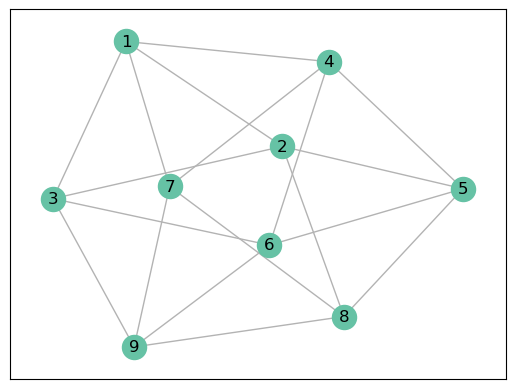

In [41]:
plt.clf()
layout = nx.spring_layout(G)
nx.draw_networkx(G, layout, with_labels=True, node_color=plt.cm.Set2(0), edge_color= plt.cm.Set2(7))
plt.show()

In [232]:
def check_not_in(nodi, lista):
    lista = np.array(lista, dtype=np.int8)
    return np.all(np.isin(nodi, lista, invert=True) == True)


def find_path(node,edges, commands, step, vis, ):
    
    # base case of the recursion
    if len(commands)==0 and node not in vis:  # if we can read every command we found a valid pattern (path)
        vis.append(node)
        return 1 

    elif len(commands) == 0: # control in case we find a cycle at the last move -> this is not valid
        return 0
        
    # take the first command in our string with the sequence of commands
    command = commands[0]

    # check condition to go backwards in the path based on where we are in the recursion 
    if vis != []:
        try:
            idx = vis.index(node)
            vis = vis[:idx]
        except:
            vis = vis
    
    # notice that a step U or D conncets nodes with a distance 3 or 6 in terms of labels of nodes!
    # a step R or L connects nodes with distance 1 or 2 in terms of labels 
    # rember that the graph is built in order to avoid edges on "diagonal" direction

    # now accroding to the command we proceed with a particular "direction" on our screen
    if command == "U" :

        # pick the nodes where I pass through when moving on the "legal" direction
        next = np.array([node -3*step, node -3*int(step/2)] if step==2 else [node -3*step])

        # in order to avoid any cycle we control that the next node is not in the visited set of nodes
        # check if the move is a "legal" move, i.e. the edge between the current node and next does exist
        if check_not_in(next, vis) and (tuple(sorted((node, next[0]))) in edges):
            vis.append(node)   # add the current node to the list of visited nodes

            # do the same for the nodes that I need to overtake in order to reach the next position
            if len(next)>1:             
                vis.append(next[1])    # to control that we don't have any intersection on a specific pattern
            
            # proceed with the recursion both moving on the given direction with a single and a "double" step
            return find_path(next[0], edges, commands[1:], 1, vis) + find_path(next[0], edges, commands[1:], 2, vis) 

    elif command == "D":
        next = np.array([node +3*step, node +3*int(step/2)] if step==2 else [node +3*step])
        if check_not_in(next, vis) and (tuple(sorted((node, next[0]))) in edges):
            vis.append(node)
            if len(next)>1:  # note that this command works only in case of double-step move
                vis.append(next[1])
            return find_path(next[0], edges, commands[1:], 1, vis) + find_path(next[0], edges, commands[1:], 2, vis)
    
    elif command == "L":
        next = np.array([node -1*step, node -1*int(step/2)] if step==2 else [node -1*step])
        if check_not_in(next, vis) and (tuple(sorted((node, next[0]))) in edges):
            vis.append(node)
            if len(next)>1:
                vis.append(next[1])
            return find_path(next[0], edges, commands[1:], 1, vis) + find_path(next[0], edges, commands[1:], 2, vis)

    elif command == "R":
        next = np.array([node +1*step, node +1*int(step/2)] if step==2 else [node +1*step])
        if check_not_in(next, vis) and (tuple(sorted((node, next[0]))) in edges):
            vis.append(node)
            if len(next)>1:
                vis.append(next[1])
            return find_path(next[0], edges, commands[1:], 1, vis) + find_path(next[0], edges, commands[1:], 2, vis)

    return 0



def count_patt( commands, nodes, edges):

    # or commands that are not informative of any direction
    for c in commands:
        if c not in "RLUD":
            print(f'command {c} not valid!')
            return 0

    # count all the "possible" patterns given the commands
    count = 0
    for n in nodes:
        count += find_path( n,edges, commands, step=1, vis=[])
        count += find_path( n,edges, commands, step=2, vis=[])
    return count

Reporting some examples

In [226]:
# reading in input the tentative commands
commands = input()
print(f'For the sequence of commands "{commands}" we have {count_patt(commands, nodes, edges)} possible paths.')

For the sequence of commands "DRU" we have 15 possible paths.


In [229]:
commands = input()
print(f'For the sequence of commands "{commands}" we have {count_patt(commands, nodes, edges)} possible paths.')

For the sequence of commands "R" we have 9 possible paths.


In [233]:
commands = input()
print(f'For the sequence of commands "{commands}" we have {count_patt(commands, nodes, edges)} possible paths.')

For the sequence of commands "LDRDRUL" we have 0 possible paths.
